In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv('/Users/mike/Downloads/train.csv')
train

/var/folders/nt/648h2qw949d1lqkypt9060gc0000gn/T/ipykernel_86050/2264572145.py:4: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('/Users/mike/Downloads/train.csv')


,Unnamed: 0,event_time,event_type,product_id,brand,price,user_id,user_session,target,cat_0,cat_1,cat_2,cat_3,timestamp,ts_hour,ts_minute,ts_weekday,ts_day,ts_month,ts_year
0,0,2019-11-01 00:00:14 UTC,cart,1005014,samsung,503.09,533326659,6b928be2-2bce-4640-8296-0efdf2fda22a,0,electronics,smartphone,NaN,NaN,2019-11-01 00:00:14,0,0,4,1,11,2019
1,1,2019-11-01 00:03:39 UTC,cart,1005115,apple,949.47,565865924,fd4bd6d4-bd14-4fdc-9aff-bd41a594f82e,0,electronics,smartphone,NaN,NaN,2019-11-01 00:03:39,0,3,4,1,11,2019
2,2,2019-11-01 00:05:54 UTC,cart,1002542,apple,486.80,549256216,dcbdc6e4-cd49-4ee8-95c5-e85f3c618fa1,0,electronics,smartphone,NaN,NaN,2019-11-01 00:05:54,0,5,4,1,11,2019
3,3,2019-11-01 00:07:22 UTC,cart,1002542,apple,486.80,549256216,dcbdc6e4-cd49-4ee8-95c5-e85f3c618fa1,0,electronics,smartphone,NaN,NaN,2019-11-01 00:07:22,0,7,4,1,11,2019
4,4,2019-11-01 00:10:45 UTC,cart,4804056,apple,160.57,522355747,0a1f37d1-71b7-4645-a8a7-ab91bc198a51,0,electronics,audio,headphone,NaN,2019-11-01 00:10:45,0,10,4,1,11,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495237,11495237,2020-01-31 23:58:08 UTC,purchase,100013136,NaN,305.03,514703063,c28543ae-3cd1-4fda-ac2e-8a6c6d16ae65,1,auto,accessories,compressor,NaN,2020-01-31 23:58:08,23,58,4,31,1,2020
11495238,11495238,2020-01-31 23:58:35 UTC,purchase,1004210,samsung,79.54,571761801,9c495f7f-e0a7-49be-8ac0-1a6383234875,1,construction,tools,light,NaN,2020-01-31 23:58:35,23,58,4,31,1,2020
11495239,11495239,2020-01-31 23:58:39 UTC,purchase,5100562,apple,294.34,518849571,13e7a25f-90cb-45e9-baf0-a94e1f90628e,1,electronics,clocks,NaN,NaN,2020-01-31 23:58:39,23,58,4,31,1,2020
11495240,11495240,2020-01-31 23:59:39 UTC,purchase,1005186,samsung,720.46,599883250,8f221a6b-20c4-43c1-a1c6-cb1b1f189efe,1,appliances,kitchen,refrigerators,NaN,2020-01-31 23:59:39,23,59,4,31,1,2020


In [2]:
#used to remove desired columns that are not important features
train.drop(['event_type','timestamp', 'event_time', 'user_session','ts_hour', 'cat_2', 'cat_3', 'ts_minute', 'ts_year'], axis=1, inplace=True)
train.drop(train.columns[0], axis=1, inplace=True)
train

,product_id,brand,price,user_id,target,cat_0,cat_1,ts_weekday,ts_day,ts_month
0,1005014,samsung,503.09,533326659,0,electronics,smartphone,4,1,11
1,1005115,apple,949.47,565865924,0,electronics,smartphone,4,1,11
2,1002542,apple,486.80,549256216,0,electronics,smartphone,4,1,11
3,1002542,apple,486.80,549256216,0,electronics,smartphone,4,1,11
4,4804056,apple,160.57,522355747,0,electronics,audio,4,1,11
...,...,...,...,...,...,...,...,...,...,...
11495237,100013136,NaN,305.03,514703063,1,auto,accessories,4,31,1
11495238,1004210,samsung,79.54,571761801,1,construction,tools,4,31,1
11495239,5100562,apple,294.34,518849571,1,electronics,clocks,4,31,1
11495240,1005186,samsung,720.46,599883250,1,appliances,kitchen,4,31,1


In [3]:
#Replacing 'target' column name with 'purchase_or_cart'
train.rename(columns = {'target':'purchase_or_cart'}, inplace=True)

In [4]:
#Removing rows that have more than 0 nan values for any feature
nan_values_train = train.isna()
sum_nan_values_train = nan_values_train.sum(axis=1)
mask_train = sum_nan_values_train > 0
train = train.loc[~mask_train, :]
train.to_csv('train_cleaned.csv')
train

,product_id,brand,price,user_id,purchase_or_cart,cat_0,cat_1,ts_weekday,ts_day,ts_month
0,1005014,samsung,503.09,533326659,0,electronics,smartphone,4,1,11
1,1005115,apple,949.47,565865924,0,electronics,smartphone,4,1,11
2,1002542,apple,486.80,549256216,0,electronics,smartphone,4,1,11
3,1002542,apple,486.80,549256216,0,electronics,smartphone,4,1,11
4,4804056,apple,160.57,522355747,0,electronics,audio,4,1,11
...,...,...,...,...,...,...,...,...,...,...
11495236,26300086,lucente,237.84,514851004,1,appliances,kitchen,4,31,1
11495238,1004210,samsung,79.54,571761801,1,construction,tools,4,31,1
11495239,5100562,apple,294.34,518849571,1,electronics,clocks,4,31,1
11495240,1005186,samsung,720.46,599883250,1,appliances,kitchen,4,31,1


Text(0, 0.5, 'Number of Items')

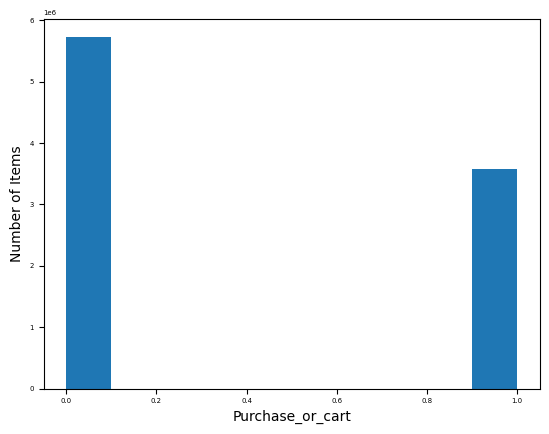

In [5]:
#Histogram for 'price' feature distribution
import matplotlib.pyplot as plt
counts = [10, 25, 15, 20]
plt.rc('xtick', labelsize=5) 
plt.rc('ytick', labelsize=5) 
#change feature based on what you want the x-axis to be
plt.hist(train['purchase_or_cart'])
plt.xlabel('Purchase_or_cart')
plt.ylabel('Number of Items')

Text(0, 0.5, 'Number of Items')

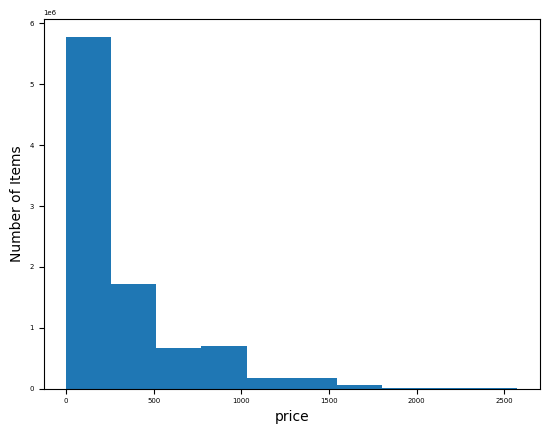

In [6]:
#Histogram for 'price' feature distribution
import matplotlib.pyplot as plt
counts = [10, 25, 15, 20]
plt.rc('xtick', labelsize=5) 
plt.rc('ytick', labelsize=5) 
#change feature based on what you want the x-axis to be
plt.hist(train['price'])
plt.xlabel('price')
plt.ylabel('Number of Items')

Text(0, 0.5, 'Number of Items')

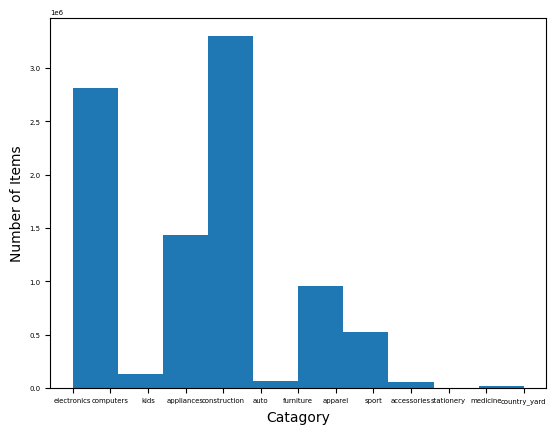

In [7]:
#Histogram for 'price' feature distribution
import matplotlib.pyplot as plt
counts = [10, 25, 15, 20]
plt.rc('xtick', labelsize=5) 
plt.rc('ytick', labelsize=5) 
#change feature based on what you want the x-axis to be
plt.hist(train['cat_0'])
plt.xlabel('Catagory')
plt.ylabel('Number of Items')

In [8]:
#Labeling catagories with numbers as a seperate column for visualization purposes
import numpy as np
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train['category_0'] = labelencoder.fit_transform(train['cat_0'])
train['category_1'] = labelencoder.fit_transform(train['cat_1'])
train['1brand'] = labelencoder.fit_transform(train['brand'])
train

/var/folders/nt/648h2qw949d1lqkypt9060gc0000gn/T/ipykernel_86050/2312984645.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['category_0'] = labelencoder.fit_transform(train['cat_0'])
/var/folders/nt/648h2qw949d1lqkypt9060gc0000gn/T/ipykernel_86050/2312984645.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['category_1'] = labelencoder.fit_transform(train['cat_1'])
/var/folders/nt/648h2qw949d1lqkypt9060gc0000gn/T/ipykernel_86050/2312984645.py:6: SettingWithCopyWarning: 
A value is trying t

,product_id,brand,price,user_id,purchase_or_cart,cat_0,cat_1,ts_weekday,ts_day,ts_month,category_0,category_1,1brand
0,1005014,samsung,503.09,533326659,0,electronics,smartphone,4,1,11,7,43,3231
1,1005115,apple,949.47,565865924,0,electronics,smartphone,4,1,11,7,43,216
2,1002542,apple,486.80,549256216,0,electronics,smartphone,4,1,11,7,43,216
3,1002542,apple,486.80,549256216,0,electronics,smartphone,4,1,11,7,43,216
4,4804056,apple,160.57,522355747,0,electronics,audio,4,1,11,7,1,216
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495236,26300086,lucente,237.84,514851004,1,appliances,kitchen,4,31,1,2,28,2178
11495238,1004210,samsung,79.54,571761801,1,construction,tools,4,31,1,5,50,3231
11495239,5100562,apple,294.34,518849571,1,electronics,clocks,4,31,1,7,10,216
11495240,1005186,samsung,720.46,599883250,1,appliances,kitchen,4,31,1,2,28,3231


In [9]:
#correlation of data
#Correlation does not show much for our data set
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm')

,product_id,price,user_id,purchase_or_cart,ts_weekday,ts_day,ts_month,category_0,category_1,1brand
product_id,1.000000,-0.138210,0.051415,-0.007590,-0.016751,0.017719,-0.138646,-0.090625,-0.120268,0.028191
price,-0.138210,1.000000,-0.041968,0.036246,0.005629,-0.012743,0.014979,0.037885,0.249971,-0.436307
user_id,0.051415,-0.041968,1.000000,0.108973,-0.044183,0.025707,-0.228449,-0.038411,0.078800,0.046890
purchase_or_cart,-0.007590,0.036246,0.108973,1.000000,-0.040558,0.025198,-0.025385,0.006230,0.059796,-0.012132
ts_weekday,-0.016751,0.005629,-0.044183,-0.040558,1.000000,-0.030944,0.023879,0.008610,-0.015317,-0.003865
ts_day,0.017719,-0.012743,0.025707,0.025198,-0.030944,1.000000,0.137613,-0.001242,-0.009022,0.009580
ts_month,-0.138646,0.014979,-0.228449,-0.025385,0.023879,0.137613,1.000000,0.062696,-0.014165,0.032194
category_0,-0.090625,0.037885,-0.038411,0.006230,0.008610,-0.001242,0.062696,1.000000,-0.160214,-0.105554
category_1,-0.120268,0.249971,0.078800,0.059796,-0.015317,-0.009022,-0.014165,-0.160214,1.000000,0.149270
1brand,0.028191,-0.436307,0.046890,-0.012132,-0.003865,0.009580,0.032194,-0.105554,0.149270,1.000000


<AxesSubplot:xlabel='ts_weekday', ylabel='cat_0'>

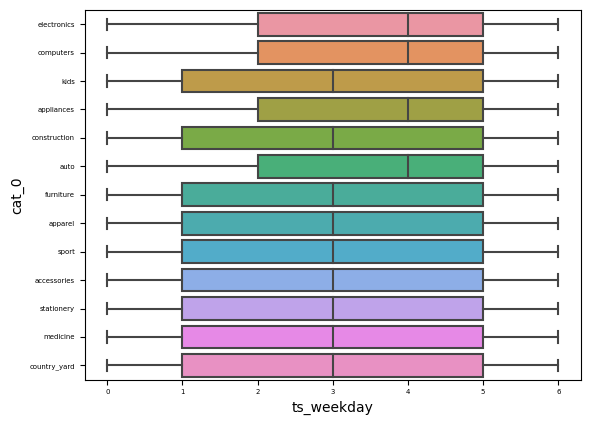

In [19]:
#box plot of the trend in categories during days of the week
import seaborn as sns
sns.boxplot(data=train, x="ts_weekday", y="cat_0")